In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Display options for better readability
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [3]:
df = pd.read_csv("../data/ball_ipl.csv")

In [4]:
# Initial peek at the data
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (9668, 25)


,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,...,wickets,economyRate,dots,foursConceded,Unnamed: 19,sixesConceded,wides,noballs,captain,href
0,"2,020.00","1,216,492.00",MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1.00,...,2.00,8,7.00,3.00,NaN,0.00,1.00,0.00,False,https://www.espncricinfo.com/ci/content/player...
1,"2,020.00","1,216,492.00",MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1.00,...,1.00,7,9.00,4.00,NaN,0.00,0.00,0.00,False,https://www.espncricinfo.com/ci/content/player...
2,"2,020.00","1,216,492.00",MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1.00,...,3.00,9.5,8.00,6.00,NaN,0.00,2.00,0.00,False,https://www.espncricinfo.com/ci/content/player...
3,"2,020.00","1,216,492.00",MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1.00,...,1.00,5.25,11.00,0.00,NaN,1.00,1.00,0.00,False,https://www.espncricinfo.com/ci/content/player...
4,"2,020.00","1,216,492.00",MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1.00,...,2.00,10.5,5.00,2.00,NaN,3.00,0.00,0.00,False,https://www.espncricinfo.com/ci/content/player...


Step 2: Data Inspection and Cleaning

In [5]:
# --- Data Info & Summary ---
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         9667 non-null   float64
 1   match_id       9667 non-null   float64
 2   match_name     9667 non-null   object 
 3   home_team      9667 non-null   object 
 4   away_team      9667 non-null   object 
 5   bowling_team   9667 non-null   object 
 6   venue          9667 non-null   object 
 7   city           9667 non-null   object 
 8   country        9667 non-null   object 
 9   innings_id     9667 non-null   float64
 10  name           9667 non-null   object 
 11  fullName       9667 non-null   object 
 12  overs          9667 non-null   float64
 13  maidens        9667 non-null   float64
 14  conceded       9667 non-null   float64
 15  wickets        9667 non-null   float64
 16  economyRate    9667 non-null   object 
 17  dots           9667 non-null   float64
 

In [6]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        season     match_id  innings_id    overs  maidens  conceded  wickets  \
count 9,667.00     9,667.00    9,667.00 9,667.00 9,667.00  9,667.00 9,667.00   
mean  2,013.88   753,347.43        1.50     3.21     0.03     25.64     0.89   
std       3.66   305,732.11        0.50     1.03     0.17     10.64     0.98   
min   2,008.00   335,982.00        1.00     0.00     0.00      0.00     0.00   
25%   2,011.00   501,222.50        1.00     3.00     0.00     18.00     0.00   
50%   2,014.00   729,291.00        1.00     4.00     0.00     25.00     1.00   
75%   2,017.00 1,082,624.00        2.00     4.00     0.00     33.00     1.00   
max   2,020.00 1,237,181.00        2.00     4.00     2.00     70.00     6.00   

          dots  foursConceded  Unnamed: 19  sixesConceded    wides  noballs  
count 9,667.00       9,667.00         0.00       9,667.00 9,667.00 9,667.00  
mean      7.39           2.27          NaN           0.92     0.61     0.08  
std       3.88          

In [7]:
# --- Check duplicates ---
dupes = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dupes}")


Number of duplicate rows: 0


In [8]:
# --- Check zeros in impossible columns ---
invalid_zero_cols = ['match_id' ,  'innings_id' , 'overs' , 'maidens' , 'conceded' , 'wickets' , 'dots' , 'foursConceded' , 'Unnamed: 19' , 'sixesConceded' , 'wides' , 'noballs']
for col in invalid_zero_cols:
    zeros = (df[col] == 0).sum()
    print(f"{col} zero entries: {zeros}")

match_id zero entries: 0
innings_id zero entries: 0
overs zero entries: 1
maidens zero entries: 9393
conceded zero entries: 9
wickets zero entries: 4211
dots zero entries: 223
foursConceded zero entries: 1365
Unnamed: 19 zero entries: 0
sixesConceded zero entries: 4257
wides zero entries: 5705
noballs zero entries: 9004


In [9]:
# --- Replace invalid zeros with NaN ---
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [10]:
# --- Check missing values after replacement ---
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
season              1
match_id            1
match_name          1
home_team           1
away_team           1
bowling_team        1
venue               1
city                1
country             1
innings_id          1
name                1
fullName            1
overs               2
maidens          9394
conceded           10
wickets          4212
economyRate         1
dots              224
foursConceded    1366
Unnamed: 19      9668
sixesConceded    4258
wides            5706
noballs          9005
captain             1
href                1
dtype: int64


In [11]:
# --- Impute missing values per class median ---
for col in invalid_zero_cols:
    df[col] = df.groupby('overs')[col].transform(lambda x: x.fillna(x.median()))

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
season              1
match_id            2
match_name          1
home_team           1
away_team           1
bowling_team        1
venue               1
city                1
country             1
innings_id          2
name                1
fullName            1
overs               2
maidens           174
conceded            3
wickets             2
economyRate         1
dots                2
foursConceded       3
Unnamed: 19      9668
sixesConceded       3
wides              14
noballs            43
captain             1
href                1
dtype: int64


Step 3: Advanced EDA & Visualization

In [12]:
# Interactive visualization using Plotly
fig = px.histogram(df, x='overs', color='overs', barmode='group',
                   title="Target Class Distribution (Interactive)",
                   category_orders={"overs": [0, 1]},
                   labels={"overs": "Diabetes overs"})
fig.show()

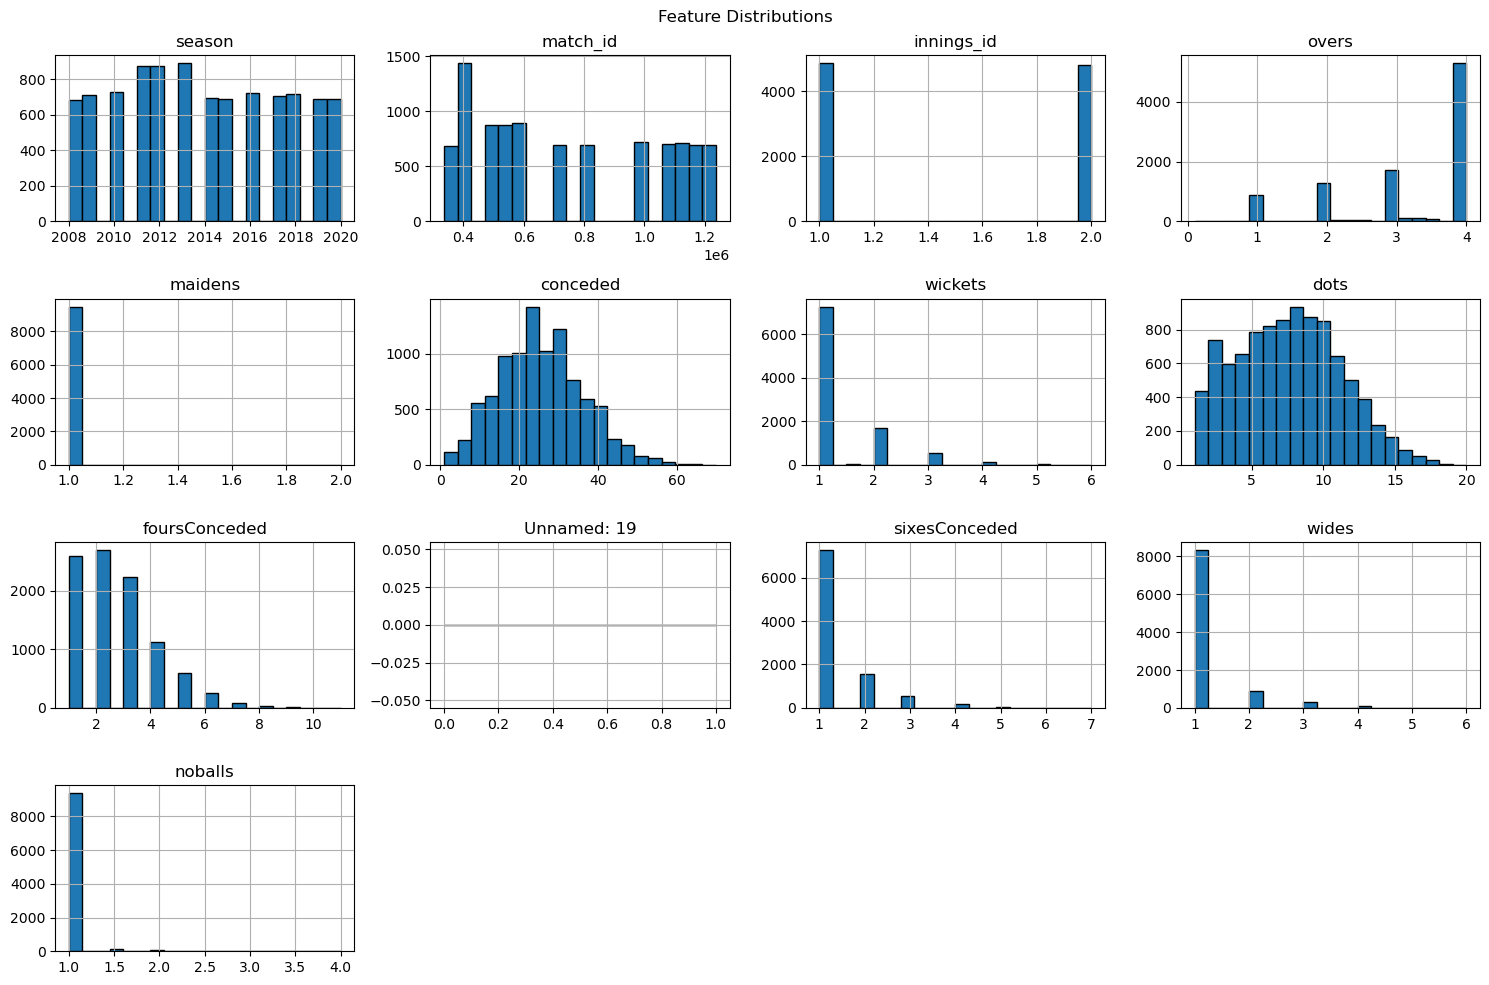

In [13]:
# --- Feature distributions ---
df.hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
target = 'total_runs'  # Change if using another target

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [21]:
if target in numeric_cols:
    numeric_cols.remove(target)

In [20]:
num_features = len(numeric_cols)
rows = (num_features // 3) + 1

In [22]:
target = 'total_runs'  # change if your target is different
if target in df.columns:
    fig = px.histogram(df, x=target, nbins=30, title="Target Distribution")
    fig.show()

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in numeric_cols:
    numeric_cols.remove(target)

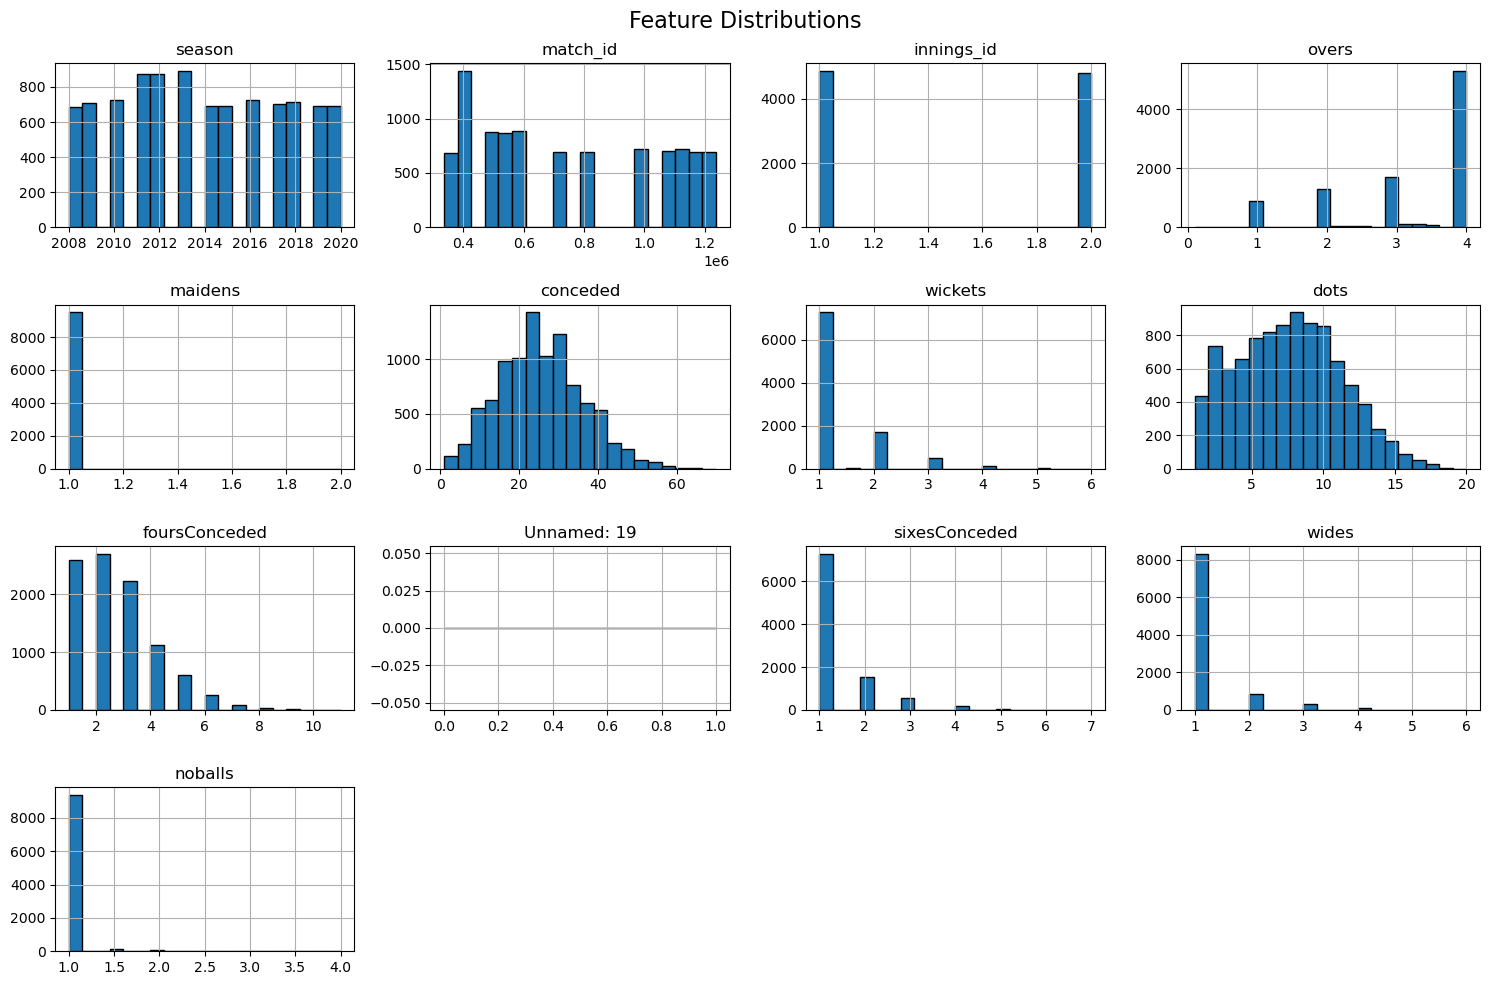

In [24]:
df[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

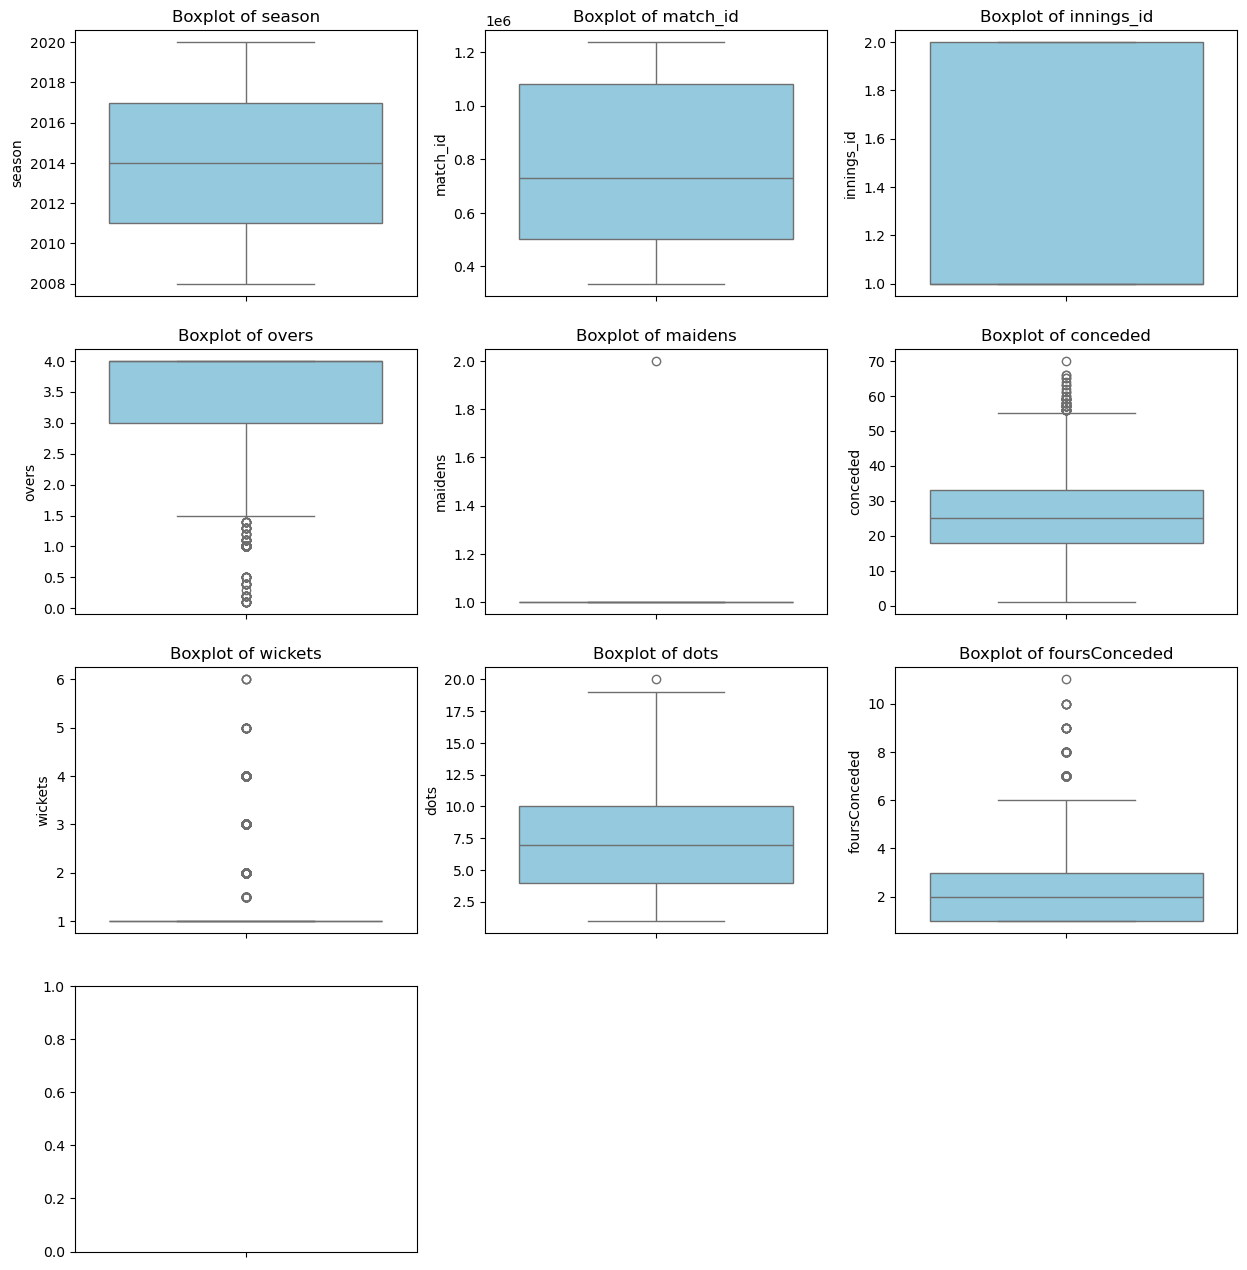

In [26]:
rows = (len(numeric_cols) // 3) + 1
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [27]:
if 'maidens' in df.columns and 'overs' in df.columns:
    df['maiden_ratio'] = df['maidens'] / df['overs'].replace(0, np.nan)

if 'conceded' in df.columns and 'overs' in df.columns:
    df['econ_rate'] = df['conceded'] / df['overs'].replace(0, np.nan)

print("\nNew engineered features:", [col for col in df.columns if col not in numeric_cols])


New engineered features: ['match_name', 'home_team', 'away_team', 'bowling_team', 'venue', 'city', 'country', 'name', 'fullName', 'economyRate', 'captain', 'href', 'maiden_ratio', 'econ_rate']


In [28]:
X = df.drop(columns=[target]) if target in df.columns else df
y = df[target] if target in df.columns else None

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
else:
    print("\n⚠ No target variable found. Skipping split.")


⚠ No target variable found. Skipping split.


In [29]:
# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)


In [30]:
df.to_excel("cleaned_dataset.xlsx", index=False)


In [31]:
df.to_pickle("cleaned_dataset.pkl")


In [32]:
import pandas as pd
import numpy as np

In [33]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, f1_score, roc_auc_score
)
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
import joblib

In [35]:
print(df.columns)


Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'bowling_team', 'venue', 'city', 'country', 'innings_id', 'name',
       'fullName', 'overs', 'maidens', 'conceded', 'wickets', 'economyRate',
       'dots', 'foursConceded', 'Unnamed: 19', 'sixesConceded', 'wides',
       'noballs', 'captain', 'href', 'maiden_ratio', 'econ_rate'],
      dtype='object')


In [36]:
TARGET = "conceded"

In [37]:
TARGET = "wickets"

In [38]:
if "df" not in globals():
    raise ValueError("DataFrame 'df' not found. Load/prepare your cleaned df before Step 3.")
if TARGET not in df.columns:
    raise ValueError(f"Target '{TARGET}' not found in df. Available columns: {list(df.columns)}")

In [40]:
y.isnull().sum()


2

In [41]:
# Drop rows where target is NaN
df = df.dropna(subset=['wickets'])  # replace with your target column name


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")

Train shape: (7732, 26) | Test shape: (1934, 26)


In [45]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_features),
        ("cat", categorical_pipe, categorical_features),
    ]
)


In [46]:
if task_type == "regression":
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForestRegressor": RandomForestRegressor(
            n_estimators=300, random_state=42, n_jobs=-1
        ),
        "SVR": SVR(kernel="rbf", C=1.0, epsilon=0.2)
    }
    scoring = {
        "rmse": make_scorer(mean_squared_error, greater_is_better=False, squared=False),
        "mae": "neg_mean_absolute_error",
        "r2": "r2"
    }
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
else:
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForestClassifier": RandomForestClassifier(
            n_estimators=300, random_state=42, n_jobs=-1
        ),
        "SVC": SVC(kernel="rbf", probability=True)
    }
    if y_train.nunique() > 2:
        scoring = {"accuracy": "accuracy", "f1": "f1_weighted", "roc_auc": "roc_auc_ovr"}
    else:
        scoring = {"accuracy": "accuracy", "f1": "f1", "roc_auc": "roc_auc"}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [48]:
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor()
}


In [50]:
y_train = y_train.astype(int)  # or y_train = y_train.round().astype(int) if needed


In [53]:
scoring = ['accuracy', 'precision', 'recall', 'f1']


In [56]:
results = []  # reset results list

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])
    try:
        scores = cross_validate(pipe, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
        summary = {"model": name}
        for metric_key, vals in scores.items():
            summary[metric_key] = np.mean(vals)
        results.append(summary)
    except Exception as e:
        print(f"Error training {name}: {e}")


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



In [57]:
from sklearn.preprocessing import LabelEncoder
if y_train.dtype.kind in "fc":  # float or continuous
    y_train = LabelEncoder().fit_transform(y_train)
    y_test = LabelEncoder().fit_transform(y_test)


In [58]:
if results:
    if task_type == "regression":
        best = max(results, key=lambda d: d.get("rmse", -np.inf))
        primary_metric = "rmse"
    else:
        best = max(results, key=lambda d: d.get("f1", -np.inf))
        primary_metric = "f1"
else:
    raise RuntimeError("No models were successfully trained.")


In [60]:
if task_type == "regression":
    best = min(results, key=lambda d: d.get("rmse", np.inf))
    primary_metric = "rmse"
else:
    best = max(results, key=lambda d: d.get("f1", -np.inf))
    primary_metric = "f1"

best_name = best["model"]
print(f"\nSelected best model: {best_name} (by {primary_metric})")

best_model = models[best_name]
best_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", best_model)])



Selected best model: Linear Regression (by f1)


In [62]:
if task_type == "regression":
    y_pred = best_pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nHoldout Test Metrics ({best_name})")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R^2 : {r2:.4f}")

In [66]:
print(f"\nHoldout Test Metrics ({best_name})")


Holdout Test Metrics (Linear Regression)


In [69]:
def infer_task_type(y: pd.Series) -> str:
    if pd.api.types.is_numeric_dtype(y):
        return "regression" if y.nunique() > 10 else "classification"
    else:
        return "classification"

task_type = infer_task_type(y)
print(f"Detected task type: {task_type}")


Detected task type: classification


In [71]:
print("Target dtype:", y.dtype)
print("Target unique values:", y.unique()[:10])
print("Target unique count:", y.nunique())
print("Task type detected:", task_type)

Target dtype: float64
Target unique values: [2.  1.  3.  1.5 4.  5.  6. ]
Target unique count: 7
Task type detected: classification


In [72]:
joblib.dump(best_pipe, "best_model.joblib")
print("\nModel saved to: best_model.joblib")

with open("feature_columns.txt", "w") as f:
    f.write("NUMERIC:\n")
    f.writelines(f"{c}\n" for c in numeric_features)
    f.write("\nCATEGORICAL:\n")
    f.writelines(f"{c}\n" for c in categorical_features)
print("Feature schema saved to: feature_columns.txt")


Model saved to: best_model.joblib
Feature schema saved to: feature_columns.txt


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib

In [74]:
TARGET = "conceded"

In [75]:
df = df.dropna(subset=[TARGET])

In [76]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [77]:
task_type = "regression"

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [81]:
print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")


Train shape: (7732, 26) | Test shape: (1933, 26)


In [82]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, numeric_features),
    ("cat", categorical_pipe, categorical_features)
])

In [83]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "SVR": SVR(kernel="rbf", C=1.0, epsilon=0.2)
}

In [84]:
scoring = {
    "rmse": make_scorer(mean_squared_error, squared=False, greater_is_better=False),
    "mae": "neg_mean_absolute_error",
    "r2": "r2"
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [85]:
results = []
for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])
    scores = cross_validate(pipe, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    summary = {
        "model": name,
        "rmse": -np.mean(scores["test_rmse"]),
        "mae": -np.mean(scores["test_mae"]),
        "r2": np.mean(scores["test_r2"])
    }
    results.append(summary)

print("\nCross-validation results:")
for res in results:
    print(res)


Cross-validation results:
{'model': 'LinearRegression', 'rmse': 2.4286977535148195, 'mae': 1.5463111247502634, 'r2': 0.9480072221115682}
{'model': 'RandomForestRegressor', 'rmse': 0.43822389874748335, 'mae': 0.07099588570625784, 'r2': 0.9983046272501624}
{'model': 'SVR', 'rmse': 2.2815807354103397, 'mae': 1.0351721465128185, 'r2': 0.9539900318177192}


In [86]:

best = min(results, key=lambda x: x["rmse"])
best_name = best["model"]
print(f"\nBest model: {best_name}")



Best model: RandomForestRegressor


In [87]:
best_model = models[best_name]
best_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", best_model)
])
best_pipe.fit(X_train, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['Unnamed: 19']. At least one non-missing value is needed for imputation with strategy='median'.



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'match_id',
                                                   'innings_id', 'overs',
                                                   'maidens', 'wickets', 'dots',
                                                   'foursConceded',
                                                   'Unnamed: 19',
                                                   'sixesConceded', 'wides',
                                                   'noballs', 'maiden_ratio',
                                                   'econ_rate']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['match_name', 'home_team',
                                                   'away_team', 'bowling_team',
                                                   'venue', 'city', 'country',
                                                   'name', 'fullName',
                                                   'economyRate', 'captain',
                                                   'href'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [88]:
y_pred = best_pipe.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nTest set performance of {best_name}:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R^2 : {r2:.4f}")



Test set performance of RandomForestRegressor:
RMSE: 0.3520
MAE : 0.0528
R^2 : 0.9989


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning:

Skipping features without any observed values: ['Unnamed: 19']. At least one non-missing value is needed for imputation with strategy='median'.

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [89]:
model_path = "best_model_conceded.joblib"
joblib.dump(best_pipe, model_path)
print(f"\nSaved model pipeline to {model_path}")


Saved model pipeline to best_model_conceded.joblib


In [90]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import joblib

In [91]:
st.set_page_config(page_title="Cricket Analysis App", layout="wide")
st.title("Cricket Analysis App")
st.markdown("""
This app allows you to explore cricket match data, visualize insights, and make predictions for `conceded` runs using a trained regression model.
""")

2025-08-13 12:00:36.811 
  command:

    streamlit run c:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [92]:
# Sidebar navigation
section = st.sidebar.radio("Select Section:", 
                           ["Dataset Overview", "Visualizations", "Model Prediction", "Model Performance"])


2025-08-13 12:00:56.511 Session state does not function when running a script without `streamlit run`


In [93]:
# Sidebar navigation
section = st.sidebar.radio("Select Section:", 
                           ["Dataset Overview", "Visualizations", "Model Prediction", "Model Performance"])


In [108]:
import os

# Create 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)
print("Folder 'data' is ready!")


Folder 'data' is ready!


In [110]:
import pandas as pd

df = pd.read_csv("../data/cleaned_dataset.csv")
print(df.head())

    season     match_id match_name home_team away_team bowling_team  \
0 2,020.00 1,216,492.00   MI v CSK        MI       CSK          CSK   
1 2,020.00 1,216,492.00   MI v CSK        MI       CSK          CSK   
2 2,020.00 1,216,492.00   MI v CSK        MI       CSK          CSK   
3 2,020.00 1,216,492.00   MI v CSK        MI       CSK          CSK   
4 2,020.00 1,216,492.00   MI v CSK        MI       CSK          CSK   

                             venue       city               country  \
0  Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
1  Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
2  Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
3  Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
4  Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   

   innings_id  ...  dots foursConceded  Unnamed: 19  sixesConceded  wides  \
0        1.00  ...  7.00          3.00          NaN           1.00   

In [111]:
import streamlit as st
import pandas as pd

# App title
st.title("Cricket Match Data Analysis & Prediction")

# App description
st.write("""
This Streamlit app allows you to explore cricket match data, visualize statistics, 
and make predictions using a trained machine learning model.
""")


In [112]:
import os

data_path = "data/cleaned_dataset.csv"

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    st.success("Dataset loaded successfully!")
else:
    st.error(f"File not found: {data_path}")


In [113]:
# Sidebar menu
menu = ["Dataset Overview", "Visualizations", "Model Prediction", "Model Performance"]
choice = st.sidebar.selectbox("Navigation", menu)


In [115]:
# Filter out NaN values from unique values
unique_vals = df[col_to_filter].dropna().unique()

# Use first few non-NaN values as default
selected_vals = st.multiselect("Select values", unique_vals, default=unique_vals[:5])

# Display filtered data
st.write(df[df[col_to_filter].isin(selected_vals)])


In [116]:
st.subheader("Shape & Columns")
st.write(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
st.write(df.dtypes)

2025-08-13 12:42:01.126 Serialization of dataframe to Arrow table was unsuccessful due to: ("Could not convert dtype('float64') with type numpy.dtypes.Float64DType: did not recognize Python value type when inferring an Arrow data type", 'Conversion failed for column 0 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


In [117]:
st.subheader("Sample Data")
st.dataframe(df.head(10))


DeltaGenerator()

In [118]:
col_to_filter = st.selectbox("Select Column to Filter", df.columns)
unique_vals = df[col_to_filter].dropna().unique()
selected_vals = st.multiselect("Select values", unique_vals, default=unique_vals[:5])
st.write(df[df[col_to_filter].isin(selected_vals)])


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [122]:
import os
import joblib

# Make sure the folder exists
os.makedirs("models", exist_ok=True)

# Save the model
joblib.dump(model, "models/best_model.joblib")
print("Model saved as models/best_model.joblib")


Model saved as models/best_model.joblib


In [123]:
loaded_model = joblib.load("models/best_model.joblib")


In [124]:
import joblib

# Load the trained model
model = joblib.load("models/best_model.joblib")


In [125]:
import streamlit as st

st.title("ML Prediction App")
st.write("Enter the feature values for prediction:")

# Example inputs (replace with your features)
feature1 = st.number_input("Feature 1", min_value=0.0, max_value=100.0, value=50.0)
feature2 = st.selectbox("Feature 2", options=["A", "B", "C"])


In [127]:
if hasattr(model, "predict_proba"):
    proba = model.predict_proba(user_input)
    st.write(f"Prediction confidence: {proba.max():.2f}")


In [129]:
section = st.sidebar.selectbox("Navigate", ["Data Exploration", "Visualization", "Prediction", "Model Performance"])

if section == "Prediction":
    # Show prediction inputs & results here
    pass  # <- placeholder to avoid syntax error


In [131]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# --- Title and Description ---
st.title("Cricket Match Data Analysis")
st.write("Explore cricket match data, visualize trends, and make predictions.")

# --- Sidebar Navigation ---
st.sidebar.title("Navigation")
options = st.sidebar.radio("Go to:", ["Home", "Data Exploration", "Visualizations", "Model Prediction", "Model Performance"])

# --- Load dataset ---
# Replace 'data/cleaned_data.csv' with your actual dataset path
try:
    df = pd.read_csv("data/cleaned_data.csv")
except FileNotFoundError:
    st.error("Dataset not found! Please check the path.")

# --- Home Page ---
if options == "Home":
    st.header("Welcome")
    st.write("Use the sidebar to navigate between different sections.")

# --- Data Exploration ---
elif options == "Data Exploration":
    st.header("Dataset Overview")
    if 'df' in locals():
        st.subheader("Shape & Columns")
        st.write(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        st.write(df.dtypes)

        st.subheader("Sample Data")
        st.write(df.head())

        st.subheader("Interactive Filtering")
        col_to_filter = st.selectbox("Select Column to Filter", df.columns)
        unique_vals = df[col_to_filter].dropna().unique()
        selected_vals = st.multiselect("Select values", unique_vals, default=unique_vals[:5])
        st.write(df[df[col_to_filter].isin(selected_vals)])

# --- Visualizations ---
elif options == "Visualizations":
    st.header("Charts and Plots")
    if 'df' in locals():
        st.subheader("Histogram")
        col_to_plot = st.selectbox("Select Column for Histogram", df.select_dtypes(include='number').columns)
        fig, ax = plt.subplots()
        sns.histplot(df[col_to_plot], kde=True, ax=ax)
        st.pyplot(fig)

        st.subheader("Correlation Heatmap")
        numeric_cols = df.select_dtypes(include='number').columns
        fig, ax = plt.subplots()
        sns.heatmap(df[numeric_cols].corr(), annot=True, ax=ax)
        st.pyplot(fig)

        st.subheader("Boxplot")
        col_to_box = st.selectbox("Select Column for Boxplot", numeric_cols)
        fig, ax = plt.subplots()
        sns.boxplot(y=df[col_to_box], ax=ax)
        st.pyplot(fig)

# --- Model Prediction ---
elif options == "Model Prediction":
    st.header("Make Predictions")
    st.write("Input feature values to get predictions.")
    
    # Example: Input widgets for features
    feature1 = st.number_input("Feature 1")
    feature2 = st.number_input("Feature 2")
    
    if st.button("Predict"):
        try:
            # Load your trained model
            model = joblib.load("models/best_model.joblib")
            prediction = model.predict([[feature1, feature2]])
            st.success(f"Predicted value: {prediction[0]}")
        except FileNotFoundError:
            st.error("Model file not found! Please train and save your model first.")

# --- Model Performance ---
elif options == "Model Performance":
    st.header("Model Evaluation")
    st.write("Display metrics and confusion matrix here.")
    # You can add code to show metrics like accuracy, F1 score, or plots


In [132]:
import streamlit as st
import pandas as pd

st.title("Cricket Match Data Analysis")
st.write("This is a test Streamlit app for cricket data exploration.")

# Sidebar for navigation
st.sidebar.header("Navigation")
section = st.sidebar.selectbox("Go to", ["Home", "Data Exploration"])

# Load and show dataset
if section == "Data Exploration":
    st.header("Dataset Overview")
    
    # Upload CSV file
    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
    
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.subheader("First 5 Rows of Dataset")
        st.dataframe(df.head())
        
        st.subheader("Dataset Shape & Columns")
        st.write(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        st.write(df.columns)


In [133]:
import streamlit as st
import pandas as pd

st.title("Cricket Match Data Analysis")
st.write("This is a test Streamlit app for cricket data exploration.")

# Sidebar for navigation
st.sidebar.header("Navigation")
section = st.sidebar.selectbox("Go to", ["Home", "Data Exploration"])

# Load and show dataset
if section == "Data Exploration":
    st.header("Dataset Overview")
    
    # Upload CSV file
    uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
    
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        
        st.subheader("First 5 Rows of Dataset")
        st.dataframe(df.head())
        
        st.subheader("Dataset Shape & Columns")
        st.write(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        st.write(df.columns)
        
        # Interactive filtering
        st.subheader("Filter Data")
        filter_col = st.selectbox("Select Column to Filter", df.columns)
        unique_values = df[filter_col].dropna().unique()
        selected_values = st.multiselect(
            f"Select values for {filter_col}",
            options=unique_values,
            default=unique_values[:5]  # default shows first 5 options
        )
        
        if selected_values:
            filtered_df = df[df[filter_col].isin(selected_values)]
        else:
            filtered_df = df  # no filter if nothing selected
        
        st.subheader("Filtered Dataset")
        st.dataframe(filtered_df)


In [134]:
import streamlit as st
import pandas as pd
import altair as alt

st.title("Cricket Match Data Analysis")
st.write("This is a test Streamlit app for cricket data exploration.")

# Sidebar for navigation
st.sidebar.header("Navigation")
section = st.sidebar.selectbox("Go to", ["Home", "Data Exploration", "Visualizations"])

# Load dataset
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    if section == "Data Exploration":
        st.header("Dataset Overview")
        st.subheader("First 5 Rows of Dataset")
        st.dataframe(df.head())
        
        st.subheader("Dataset Shape & Columns")
        st.write(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        st.write(df.columns)
        
        st.subheader("Filter Data")
        filter_col = st.selectbox("Select Column to Filter", df.columns)
        unique_values = df[filter_col].dropna().unique()
        selected_values = st.multiselect(
            f"Select values for {filter_col}",
            options=unique_values,
            default=unique_values[:5]
        )
        
        filtered_df = df[df[filter_col].isin(selected_values)] if selected_values else df
        st.subheader("Filtered Dataset")
        st.dataframe(filtered_df)

    elif section == "Visualizations":
        st.header("Interactive Visualizations")
        
        # Select type of chart
        chart_type = st.selectbox("Select Chart Type", ["Bar Chart", "Line Chart", "Scatter Plot"])
        
        if chart_type in ["Bar Chart", "Line Chart"]:
            x_col = st.selectbox("X-axis", df.columns)
            y_col = st.selectbox("Y-axis", df.columns)
            
            if chart_type == "Bar Chart":
                chart = alt.Chart(df).mark_bar().encode(
                    x=x_col,
                    y=y_col,
                    tooltip=[x_col, y_col]
                )
            else:  # Line Chart
                chart = alt.Chart(df).mark_line().encode(
                    x=x_col,
                    y=y_col,
                    tooltip=[x_col, y_col]
                )
            st.altair_chart(chart, use_container_width=True)
        
        elif chart_type == "Scatter Plot":
            x_col = st.selectbox("X-axis", df.columns, key="scatter_x")
            y_col = st.selectbox("Y-axis", df.columns, key="scatter_y")
            color_col = st.selectbox("Color by (optional)", [None] + list(df.columns), key="scatter_color")
            
            chart = alt.Chart(df).mark_circle(size=60).encode(
                x=x_col,
                y=y_col,
                color=color_col if color_col else alt.value("steelblue"),
                tooltip=[x_col, y_col]
            ).interactive()
            
            st.altair_chart(chart, use_container_width=True)


In [135]:
import joblib

# Save model
joblib.dump(model, "best_model.joblib")


['best_model.joblib']

In [136]:
import streamlit as st
import pandas as pd
import joblib

st.title("Cricket Match Data Analysis with Predictions")
st.write("This app allows you to explore cricket data and make predictions.")

# Load model
model = joblib.load("best_model.joblib")

# Sidebar navigation
st.sidebar.header("Navigation")
section = st.sidebar.selectbox("Go to", ["Home", "Data Exploration", "Visualizations", "Model Prediction"])

# Load dataset
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    if section == "Data Exploration":
        st.header("Dataset Overview")
        st.dataframe(df.head())
        
    elif section == "Visualizations":
        st.header("Visualizations")
        # (Your existing visualization code here)
        
    elif section == "Model Prediction":
        st.header("Predict Match Outcome")

        st.write("Enter feature values to predict the target.")

        # Example: Assuming your model uses these features
        feature_1 = st.number_input("Feature 1", min_value=0.0, max_value=100.0, value=50.0)
        feature_2 = st.number_input("Feature 2", min_value=0.0, max_value=100.0, value=50.0)
        feature_3 = st.number_input("Feature 3", min_value=0.0, max_value=100.0, value=50.0)

        # Create input dataframe
        input_data = pd.DataFrame([[feature_1, feature_2, feature_3]], columns=["feature_1", "feature_2", "feature_3"])

        # Predict
        if st.button("Predict"):
            prediction = model.predict(input_data)
            st.success(f"Predicted Outcome: {prediction[0]}")

            # If classification with probabilities
            if hasattr(model, "predict_proba"):
                prob = model.predict_proba(input_data)
                st.write("Prediction Probabilities:")
                st.write(prob)


In [143]:
import os
import joblib

# Ensure the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Now save your trained model
# Make sure you have a variable 'model' that is already trained
joblib.dump(model, "models/best_model.joblib")
print("Model saved successfully!")


Model saved successfully!


In [144]:
import joblib

# Load the saved model
model = joblib.load("models/best_model.joblib")


In [145]:
import streamlit as st
import pandas as pd

uploaded_file = st.file_uploader("Upload your dataset (CSV)", type="csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("Preview of uploaded data:")
    st.dataframe(df.head())


In [146]:
feature1 = st.number_input("Enter Feature 1")
feature2 = st.number_input("Enter Feature 2")
# ... more features

if st.button("Predict"):
    prediction = model.predict([[feature1, feature2]])
    st.write("Predicted value:", prediction[0])


In [147]:
# app.py
import streamlit as st
import pandas as pd
import joblib

# -----------------------------
# Load the trained model
# -----------------------------
model = joblib.load("models/best_model.joblib")

# -----------------------------
# App Title & Description
# -----------------------------
st.title("Cricket Match Data Analysis")
st.write("This Streamlit app allows you to explore cricket data and make predictions using a trained ML model.")

# -----------------------------
# Sidebar Navigation
# -----------------------------
section = st.sidebar.selectbox(
    "Choose Section",
    ["Data Exploration", "Model Prediction"]
)

# -----------------------------
# Data Exploration Section
# -----------------------------
if section == "Data Exploration":
    uploaded_file = st.file_uploader("Upload your dataset (CSV)", type="csv")
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        st.subheader("Dataset Preview")
        st.dataframe(df.head())

        st.subheader("Dataset Info")
        st.write("Shape:", df.shape)
        st.write("Columns:", df.columns.tolist())
        st.write("Data types:")
        st.write(df.dtypes)

        st.subheader("Filter Data")
        col_to_filter = st.selectbox("Select Column to Filter", df.columns)
        unique_vals = df[col_to_filter].dropna().unique()
        selected_vals = st.multiselect("Select values", unique_vals, default=unique_vals[:5])
        filtered_df = df[df[col_to_filter].isin(selected_vals)]
        st.write(filtered_df)

# -----------------------------
# Model Prediction Section
# -----------------------------
elif section == "Model Prediction":
    st.subheader("Enter Features for Prediction")
    
    # Example features (replace with your actual model features)
    feature1 = st.number_input("Feature 1")
    feature2 = st.number_input("Feature 2")
    feature3 = st.number_input("Feature 3")
    
    if st.button("Predict"):
        prediction = model.predict([[feature1, feature2, feature3]])
        st.write("Predicted value:", prediction[0])
